<a href="https://colab.research.google.com/github/smvicky/assignment_1.3/blob/module2.4/PT_DS_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Pixeltests School Data Science - Unit 1 Sprint 2 Module 4

## Module Project: Introduction to Bayesian Inference



#### Total notebook points: 12

## Introduction

In this project, we're going to practice calculating conditional probabilities. You will use Python and the pandas cross tabulation method to look at various survival scenarios. After you complete the Titanic calculations, we'll visit the Harry Potter Universe and apply what we learned to the Sorting Hat situation at Hogwarts (a detailed description of the problem is provided - you don't need to have any familiarity with the Harry Potter books or movies).

### Data set

We'll be working with the Titanic dataset for this Module Project. It is available in various locations but the data at the URL provided is what we'll use today.

### Warmup Question

In your own words, summarize the difference between Bayesian and Frequentist statistics.

ANSWER: Bayesian tells more realistic conclusion than Frequentist


## Part A

### Conditional Probabilities

For Tasks 1 - 8 use the following information:

Let **A** be the event of surviving the sinking of the Titanic and **B** be the event of being a 1st class passenger.

**Task 1** - Load the data

As we usually begin, let's load the data! The URL has been provided.

* load your CSV file into a DataFrame named `df`

In [38]:
# Task 1

import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/pixeltests/datasets/main/titanic.csv'
# YOUR CODE HERE
#raise NotImplementedError()
df = pd.read_csv(data_url, skipinitialspace=True, header=0)

# View the DataFrame
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


**Task 1 - Test**

In [39]:
# Task 1 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 887


**Task 2** - Survival probability

We'll start by calculating the probability of surviving; we'll write the probability as P(A)

* calculate the cross tabulation for the `Pclass` and `Survived` variables and assign it to `cross_tab`.  Make sure to include the table margins.
* using the cross tabulation results, calculate P(A) and assign it to the variable `p_a`

*Hint: we write the probability of an event using a decimal, not a percent.*

In [40]:
# Task 2

# YOUR CODE HERE
cross_tab = pd.crosstab(index=df['Pclass'],columns= df['Survived'], margins=True)
p_a = cross_tab[1]['All']/cross_tab['All']['All']
print('The value of P(A) is:', p_a)

The value of P(A) is: 0.3855693348365276


**Task 2 - Test**

In [41]:
# Task 2 - Test
assert isinstance(cross_tab, pd.DataFrame), 'Did you create the cross tabulation DataFrame?'
assert cross_tab.shape == (4,3), 'Did you remember to include the margins?'


**Task 3** - First class probability

Next we'll calculate the probability of being a First Class passenger; we'll write this probability as P(B)

* using the cross tabulation results, calculate P(B) and assign it to the variable `p_b`

*Hint: we write the probability of an event using a decimal, not a percent.*

In [42]:
# Task 3

# YOUR CODE HERE

p_b = cross_tab['All'][1]/cross_tab['All']['All']
print('The value of P(B) is:', p_b)


The value of P(B) is: 0.24351747463359638


**Task 3 - Test**

In [43]:
# Task 3 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 4** - Conditional probability: A and B

Now, we'll calculate the conditional probability of being a First Class passenger **and** surviving. We write this as P(A $\cap$ B) and we read it as "the probability of A and B".

* calculate the conditional probability P(A $\cap$ B) and assign it to the variable `p_a_and_b`

*Hint: we write the probability of an event using a decimal, not a percent.*

In [44]:
# Task 4

# YOUR CODE HERE
# cross_tab
p_a_and_b = cross_tab[1][1]/cross_tab['All']['All']
print('The value of P(A and B) is:', p_a_and_b)

The value of P(A and B) is: 0.15332581736189402


**Task 4 - Test**

In [45]:
# Task 4 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 5** - Conditional probability: A given B

Next, we'll calculate the conditional probability of surviving given the person was a First Class passenger. We write this as P(A|B) and we read it as "the probability of A given B".

* generate a new cross tabulation with the parameter `normalize='index'`; name this table `cross_tab_norm`
* calculate the conditional probability P(A|B) and assign it to the variable `p_a_given_b`

*Hint: we write the probability of an event using a decimal, not a percent.*

In [52]:
# Task 5

# YOUR CODE HERE
cross_tab_norm = pd.crosstab(index=df['Pclass'],columns= df['Survived'], normalize="index")
p_a_given_b =  cross_tab_norm[1][1]
print('The value of P(A given B) is:', p_a_given_b)

The value of P(A given B) is: 0.6296296296296297


**Task 5 - Test**

In [54]:
# Task 5 - Test
assert isinstance(cross_tab_norm, pd.DataFrame), 'Did you create the new cross tabulation DataFrame?'

**Task 6** - Conditional probability: B given A

Okay, now we'll calculate the conditional probability of being a First Class passenger given the person survived. We write this as P(B|A) and we read it as "the probability of B given A".

* create a new cross tabulation DataFrame and name it `cross_tab_norm2`.
    * *Hint: You may find it helpful to reverse the order of the columns when you calculate the new table*
* calculate the conditional probability P(B|A) and assign it to the variable `p_b_given_a`

In [61]:
# Task 6

# YOUR CODE HERE
cross_tab_norm2 = pd.crosstab(index= df['Survived'],columns=df['Pclass'], normalize="columns")
# cross_tab_norm2
p_b_given_a = cross_tab_norm2[1][1]
print('The value of P(B given A) is:', p_b_given_a)

The value of P(B given A) is: 0.6296296296296297


**Task 6 - Test**

In [62]:
# Task 6 - Test
assert isinstance(cross_tab_norm2, pd.DataFrame), 'Did you create another new cross tabulation DataFrame?'

**Task 7**

So far, we have calculated the individual probabilities: P(A), P(B), P(A $\cap$ B), P(A|B), and P(B|A). Now we're going to calculate the conditional probability P(A|B) using the following equation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

* calculate the value of P(A|B) and assign it to the variable `calc1_p_a_given_b`
* compare it to your value from Task 5 by testing if `p_a_given_b` is equal to `calc1_p_a_given_b` (use an assert statement!)

In [70]:
# Task 7

# YOUR CODE HERE
calc1_p_a_given_b = p_a_and_b/p_b
assert calc1_p_a_given_b==p_a_given_b, 'both probability are not same'
print('The calculated value of P(A|B) is:', calc1_p_a_given_b)

The calculated value of P(A|B) is: 0.6296296296296297


**Task 7 - Test**

In [66]:
# Task 7 - Test

# Use this test to check your answer before submitting to Canvas/CodeGrade
assert round(calc1_p_a_given_b, 1)== round(p_a_given_b, 1), 'Did you use the correct variables in your calculation?'


**Task 8**

Finally, we're at the last calculation! We want to calculate P(A|B) again, using Bayes' Theorem:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

* calculate the value of P(A|B) and assign it to the variable `calc2_p_a_given_b` (*notice the new variable name*)
* compare it to your value from Task 5 by testing if p_a_given_b is equal to `calc2_p_a_given_b` (again, use an assert statement)

In [75]:
# Task 8

# YOUR CODE HERE
p_b_given_a = cross_tab[1][1]/cross_tab[1]['All']
calc2_p_a_given_b = (p_b_given_a*p_a)/p_b
print("The calculated value of P(A|B) using Bayes' Theorem is:", calc2_p_a_given_b)

The calculated value of P(A|B) using Bayes' Theorem is: 0.6296296296296297


**Task 8 - Test**

In [76]:
# Task 8 - Test

# Use this test to check your answer before submitting to Canvas/CodeGrade
assert round(calc2_p_a_given_b, 1) == round(p_a_given_b, 1), 'Did you use the correct variables in your calculation?'

## Part B

### Hogwarts Sorting Hat and Conditional Probabilities

Use the following information to complete Tasks 9 - 13


Students arriving at Hogwarts are sorted into one of the four residential houses -- Gryffindor, Hufflepuff, Ravenclaw, and Slytherin -- by the magical Sorting Hat.

In theory, the Hat is supposed to examine each student's personality, consider his or her wishes, and then place the student into the most appropriate house. However, after a thousand years, the Hat has gotten pretty lazy, so it has simplified its sorting process into a two-step algorithm:

* All evil students go into Slytherin, obviously.

* Everybody else is just randomly sorted into one of the four houses, with a 40% probability of being put into Hufflepuff and a 20% probability of being put into each of the three other houses.

Hermione is shocked when she's sorted into Slytherin! She's never thought of herself as evil, but now that she considers it, becoming the future Dark Lady of Magical Britain does have some appeal...

**If 10% of new Hogwarts students are evil, what is the probability that a randomly chosen Slytherin is evil?**

*Hint: the value you want is P(Evil | Slytherin).*

**Task 9** - Write out probability steps

Write the relationship used to P(Evil|Slitherin) from P(Slithern|Evil), p(Evil) and P(Slytherin):

* this Task is not autograded; write out your steps in the following markdown cell

**Task 9** - ANSWER


Consdie 100 students enters then


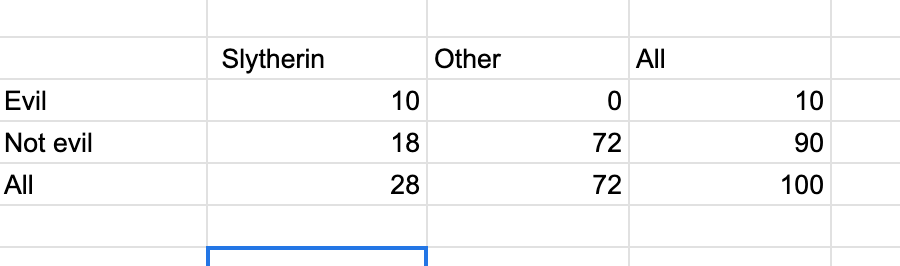

P(Evil|Slitherin) = (P(Slithern|Evil) * p(Evil))/P(Slytherin)

**Task 10** - Determine P(Slytherin|Evil)

Using the description in Part B above, determine P(Slytherin|Evil)

* assign your value to the variable `p_slytherin_given_evil`

In [85]:
# Task 10

# YOUR CODE HERE
import pandas as pd

data = [[10, 0],
    [18, 72]]

df = pd.DataFrame(data, index=['Evil', 'Not evil'],columns=['Syntherin','other'])
print(df)

# print("The probability of being Slytherin given a student is evil is:", p_slytherin_given_evil)

          Syntherin  other
Evil             10      0
Not evil         18     72


**Task 10 - Test**

In [ ]:
# Task 10 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 11** - Determine P(Evil)

Using the description in Part B above, determine P(Evil)

* assign your value to the variable `p_evil`

In [ ]:
# Task 11

# YOUR CODE HERE
raise NotImplementedError()

print("The probability of being an evil student is:", p_evil)

**Task 11 - Test**

In [ ]:
# Task 11 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 12** - Determine P(Slytherin)

Hint: This is a little tricky.  This is equal to the probability of a student being evil (and therefore being sorted into Slytherin) **added to** the probability of not being evil and being sorted into Slytherin.

* assign the value of P(NOT Evil and Slytherin) to `p_not_evil_and_slytherin`
* calculate the value of P(Slytherin) and assign it to `p_slytherin`

In [ ]:
# Task 12

# YOUR CODE HERE
raise NotImplementedError()

print("The probability of a student being in Slytherin is:", p_slytherin)

**Task 12 - Test**

In [ ]:
# Task 12 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 13** - Calculate P(Evil|Slytherin)

We have arrived at the final Sorting Hat calculation! Now, we're are going to calculate the probability of P(Evil|Slytherin) using the following equation:

$$P(Evil|Slytherin)= \frac{P(Slytherin|Evil)P(Evil)}{P(Slytherin)}$$

* calculate P(Evil|Slytherin) and assign it to `p_evil_given_slytherin`

In [ ]:
# Task 13

# YOUR CODE HERE
raise NotImplementedError()

**Task 13 - Test**

In [ ]:
# Task 13 - Test
# Hidden tests - you will see the results when you submit to Canvas